In [ ]:
# Import libraries
import geopandas as gpd
from sqlalchemy import create_engine
import geoalchemy2
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import overpass
import os
from dotenv import load_dotenv
import folium
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Connect to postgis database
load_dotenv()

DATABASE_URL = os.getenv("DB_URL")
conn = psycopg2.connect(DATABASE_URL)
cursor = conn.cursor()
sql_query = 'SELECT * FROM moab_offroad_trails'


# Use GeoPandas to execute the query and load the results into a GeoDataFrame
gdf = gpd.read_postgis(sql_query, con=DATABASE_URL, geom_col='combined_geometry')

print(gdf.head())

                                            geometry type          id  \
0  0102000020AD1000002201000017ADED3724625BC081E9...  way  1051349132   
1  0102000020AD1000006A000000E3B08FA996675BC0AB08...  way   427670420   
2  0102000020AD100000070000006DC9AA0837665BC07132...  way  1050329400   
3  0102000020AD10000029000000C90F4BB931665BC0CDFC...  way   998260561   
4  0102000020AD1000002D0000000EF8FC3042665BC01072...  way   998260562   

                                                tags  \
0  {'bicycle': 'yes', 'dirtbike:scale': '?', 'hig...   
1  {'bicycle': 'yes', 'highway': 'track', 'motor_...   
2  {'highway': 'path', 'name': 'Amasa Back Connec...   
3  {'highway': 'path', 'name': 'Amasa Back Connec...   
4  {'highway': 'path', 'mtb:scale:imba': '2', 'na...   

                                               nodes horse bridge  \
0  [9661445276, 9661460801, 9661460737, 966146086...  None   None   
1  [324413638, 12329805085, 324413637, 3499929441...  None   None   
2  [9652200709, 1

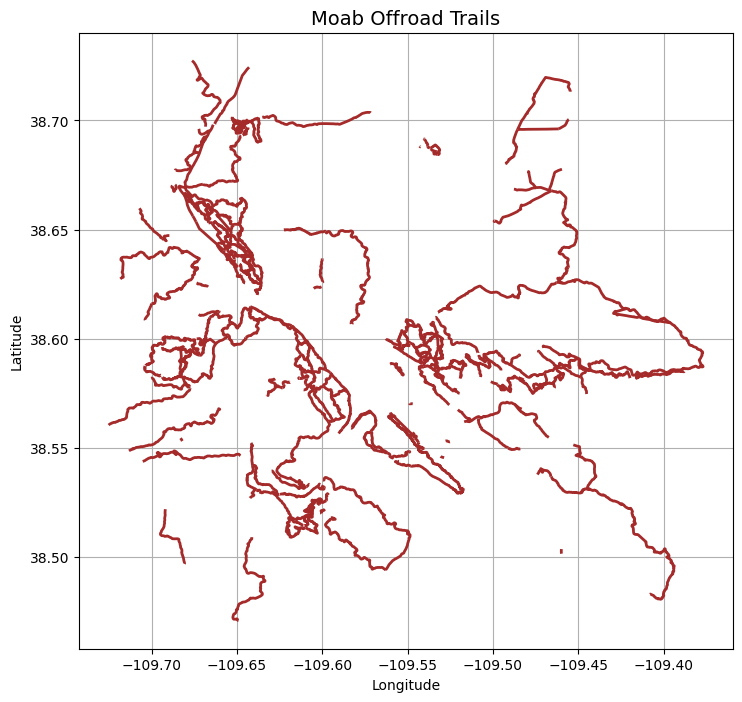

In [24]:
# Convert to a GeoDataFrame
#gdf = gdf.to_crs("EPSG:26912")
# Plot the trails
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color="brown", linewidth=2)

# Customize the plot
ax.set_title("Moab Offroad Trails", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)

# Show the plot
plt.show()

In [25]:
m = folium.Map(zoom_start=12)
folium.GeoJson(gdf).add_to(m)
m

In [26]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [27]:
api = overpass.API()

overpass_query = """
(
  way["highway"="track"](38.50,-109.70,38.70,-109.40);
  way["highway"="path"](38.50,-109.70,38.70,-109.40);
);
out geom;
"""
response = api.get(overpass_query)
print(response)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'type': 'way', 'id': 10104593, 'tags': {'highway': 'track', 'maxspeed': '15 mph', 'oneway': 'no', 'operator': 'Sand Flats Recreation Area', 'surface': 'dirt', 'tracktype': 'grade3'}, 'nodes': [83175624, 83175626, 6419421513, 6419421253, 83175630, 83175631, 8361474776, 83175632, 11347365727, 11347365726, 83175634, 8361474775, 3522643274, 8361474774, 83175636, 11347365725, 8361474773, 83175638, 11347365718, 83175640, 83175642, 8361474772, 3522644629, 3522644625, 83175644, 83175646, 9276164737, 83175648, 83175650, 9276164736, 83175652, 83175654, 83175656, 9276164735, 9276164734, 9276164733, 9276164732, 9276164731, 9276164730, 9276164729, 9276164728, 9276164727, 9276164726, 9276164725, 9276164724, 9276164723, 9276164722, 9276164721, 9276164720, 9276164719, 1556399924]}, 'geometry': {'type': 'LineString', 'coordinates': [[-109.4955523, 38.5821805], [-109.4955651, 38.5823477], [-109.4955421, 38.5824889], [-109.4955

In [28]:
response

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'type': 'way',
    'id': 10104593,
    'tags': {'highway': 'track',
     'maxspeed': '15 mph',
     'oneway': 'no',
     'operator': 'Sand Flats Recreation Area',
     'surface': 'dirt',
     'tracktype': 'grade3'},
    'nodes': [83175624,
     83175626,
     6419421513,
     6419421253,
     83175630,
     83175631,
     8361474776,
     83175632,
     11347365727,
     11347365726,
     83175634,
     8361474775,
     3522643274,
     8361474774,
     83175636,
     11347365725,
     8361474773,
     83175638,
     11347365718,
     83175640,
     83175642,
     8361474772,
     3522644629,
     3522644625,
     83175644,
     83175646,
     9276164737,
     83175648,
     83175650,
     9276164736,
     83175652,
     83175654,
     83175656,
     9276164735,
     9276164734,
     9276164733,
     9276164732,
     9276164731,
     9276164730,
     9276164729,
     9276164728,
     9276164727,
     9276

In [100]:
geojson = {
    "type": "FeatureCollection",
    "features": []
}

for feature in response["features"]:
    if "geometry" in feature and feature["geometry"]["type"] == "LineString":
        geojson["features"].append({
            "type": "Feature",
            "geometry": feature["geometry"],
            "properties": feature["properties"]
        })

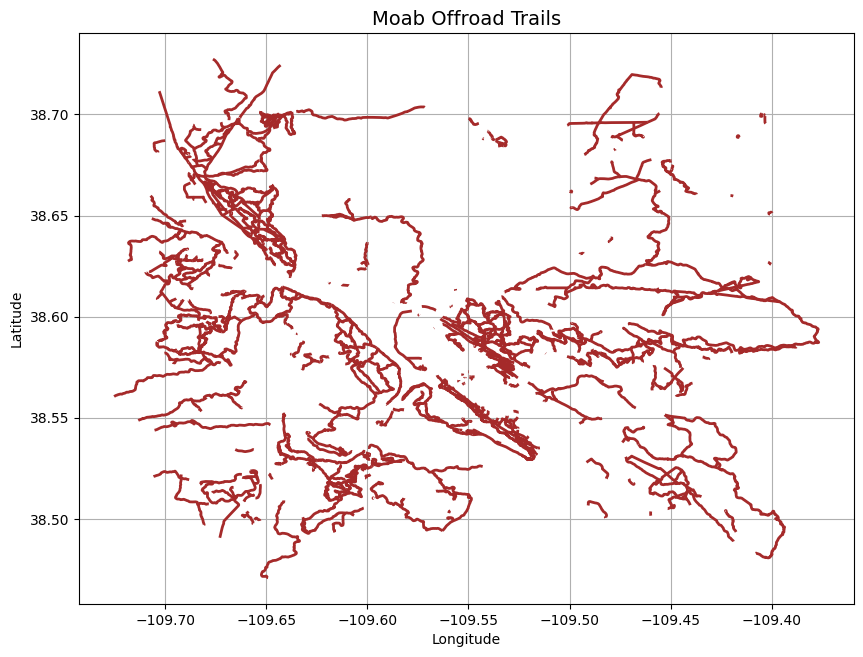

In [101]:
# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(geojson["features"])
gdf = gdf.set_crs("EPSG:26912")
# Plot the trails
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color="brown", linewidth=2)

# Customize the plot
ax.set_title("Moab Offroad Trails", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)

# Show the plot
plt.show()

In [102]:
gdf.head()

geometry type        id  \
0  LINESTRING (-109.496 38.582, -109.496 38.582, ...  way  10104593   
1  LINESTRING (-109.453 38.575, -109.452 38.574, ...  way  10105121   
2  LINESTRING (-109.402 38.627, -109.402 38.627, ...  way  10105185   
3  LINESTRING (-109.493 38.68, -109.493 38.68, -1...  way  10105391   
4  LINESTRING (-109.449 38.675, -109.449 38.675, ...  way  10105462   

                                                tags  \
0  {'highway': 'track', 'maxspeed': '15 mph', 'on...   
1  {'foot': 'yes', 'highway': 'track', 'horse': '...   
2          {'access': 'private', 'highway': 'track'}   
3  {'foot': 'yes', 'highway': 'track', 'horse': '...   
4                               {'highway': 'track'}   

                                               nodes  
0  [83175624, 83175626, 6419421513, 6419421253, 8...  
1  [83187556, 83187558, 83187560, 83187562, 93598...  
2  [83188822, 83188844, 7578864938, 7578864939, 7...  
3  [8623047389, 8623047388, 8623047387, 862304738...  
4  [83194481, 83194483, 83194485, 83194487, 83194...

In [103]:
all_keys = set()
gdf["tags"].dropna().apply(lambda tags: all_keys.update(tags.keys()))

print(all_keys)

{'name', 'tracktype', 'atv', 'oneway', 'alt_name', 'incline', 'covered', 'layer', 'motor_vehicle', '4wd_only', 'operator', 'area', 'informal', 'dirtbike:scale', 'description', 'mtb:scale', 'width', 'maxspeed', 'maintained', 'old_name', 'surface', 'source', 'electric_bicycle', 'bridge', 'smoothness', 'foot', 'official_ref', 'lit', 'note', 'mtb:scale:imba', 'highway', 'pathtype', 'sac_scale', 'motorcycle', 'access', 'name:prefix', 'trail_visibility', 'mtb:scale:amtb', 'safety_rope', 'name:full', 'bicycle', 'ref', 'time', 'horse', 'disused:highway', 'opening_hours'}


In [91]:
# Create new columns with default value None
for key in all_keys:
    gdf[key] = gdf["tags"].apply(lambda tags: tags.get(key) if isinstance(tags, dict) else None)

# Drop the original 'tags' column
gdf = gdf.drop(columns=["tags"])

In [98]:
gdf.head()

geometry type        id  \
0  LINESTRING (-109.496 38.582, -109.496 38.582, ...  way  10104593   
1  LINESTRING (-109.453 38.575, -109.452 38.574, ...  way  10105121   
2  LINESTRING (-109.402 38.627, -109.402 38.627, ...  way  10105185   
3  LINESTRING (-109.493 38.68, -109.493 38.68, -1...  way  10105391   
4  LINESTRING (-109.449 38.675, -109.449 38.675, ...  way  10105462   

                                               nodes      name tracktype  \
0  [83175624, 83175626, 6419421513, 6419421253, 8...      None    grade3   
1  [83187556, 83187558, 83187560, 83187562, 93598...      None    grade3   
2  [83188822, 83188844, 7578864938, 7578864939, 7...      None      None   
3  [8623047389, 8623047388, 8623047387, 862304738...  Dry Mesa    grade3   
4  [83194481, 83194483, 83194485, 83194487, 83194...      None      None   

    atv oneway alt_name incline  ... trail_visibility mtb:scale:amtb  \
0  None     no     None    None  ...             None           None   
1  None   None     None    None  ...             None           None   
2  None   None     None    None  ...             None           None   
3  None   None     None    None  ...             None           None   
4  None   None     None    None  ...             None           None   

  safety_rope name:full bicycle   ref  time horse disused:highway  \
0        None      None    None  None  None  None            None   
1        None      None    None  None  None   yes            None   
2        None      None    None  None  None  None            None   
3        None      None    None  None  None   yes            None   
4        None      None    None  None  None  None            None   

  opening_hours  
0          None  
1          None  
2          None  
3          None  
4          None  

[5 rows x 50 columns]

In [94]:
columns_to_keep = [
    'id', 'name', 'tracktype', 'atv', 'oneway', 'alt_name', 'incline', 'covered',
    'layer', 'motor_vehicle', 'operator', 'area', 'informal', 'description',
    'width', 'maxspeed', 'maintained', 'old_name', 'surface', 'source',
    'electric_bicycle', 'bridge', 'smoothness', 'foot', 'official_ref', 'lit', 'note',
    'highway', 'pathtype', 'sac_scale', 'motorcycle', 'access', 'trail_visibility', 
    'safety_rope', 'bicycle', 'ref', 'time', 'horse', 
    'opening_hours', 'geometry'
]

# Filter the GeoDataFrame to keep only these columns
gdf_filtered = gdf[columns_to_keep]

In [97]:
# Create a connection engine
engine = create_engine(os.getenv("DB_URL"))

gdf_filtered.to_postgis('offroad_trails', engine, if_exists='append', index=False)